# Efficiently iterating over rows in a Pandas DataFrame



In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/mlabonne/How-to-Data-Science/main/data/nslkdd_test.txt')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
for index, row in df.iterrows():
  print(index, row)
  break

0 duration                             0
protocol_type                      tcp
service                        private
flag                               REJ
src_bytes                            0
dst_bytes                            0
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            0
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                              229
srv_count                           10
serror_rate                        0.0
srv_serror_rate        

## Bucle for clásico

In [ ]:
%%timeit -n 10
total=[]
for i in range(df.shape[0]):
  total.append(df['src_bytes'][i] + df['dst_bytes'][i])


230 ms ± 30.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ❌ 1. Iterrows

In [ ]:
%%timeit -n 10
# Iterrows
total = []
for index, row in df.iterrows():
    total.append(row['src_bytes'] + row['dst_bytes'])

952 ms ± 62.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ❌ 2. For loop with .loc or .iloc (3× faster)

In [ ]:
%%timeit -n 10
# For loop with .loc
total = []
for index in range(len(df)):
    total.append(df['src_bytes'].loc[index] + df['dst_bytes'].loc[index])

542 ms ± 56.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10
# For loop with .iloc
total = []
for index in range(len(df)):
    total.append(df['src_bytes'].iloc[index] + df['dst_bytes'].iloc[index])

385 ms ± 55.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ❌ 3. Apply (4× faster)

In [ ]:
%%timeit -n 10
# Apply
df.apply(lambda row: row['src_bytes'] + row['dst_bytes'], axis=1).to_list()

200 ms ± 38.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ❌ 4. Itertuples (10× faster)

In [ ]:
%%timeit -n 10
# Itertuples
total = []
for row in df.itertuples():
    total.append(row.src_bytes + row.dst_bytes)

98.8 ms ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ❌ 5. List comprehensions (200× faster)

In [ ]:
%%timeit -n 100
# List comprehension
[src + dst for src, dst in zip(df['src_bytes'], df['dst_bytes'])]

7.01 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## ✅ 6. Pandas vectorization (1500× faster)

In [ ]:
%%timeit -n 1000
# Vectorization
(df['src_bytes'] + df['dst_bytes']).to_list()

699 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##✅ 7. NumPy vectorization (1900× faster)


In [ ]:
%%timeit -n 1000
# Numpy vectorization
(df['src_bytes'].to_numpy() + df['dst_bytes'].to_numpy()).tolist()

566 µs ± 8.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 8. Reduce

In [ ]:
%%timeit -n 10
from functools import reduce
total = reduce(lambda a, b: a+b, [df.src_bytes,df.dst_bytes])
total

292 µs ± 159 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Bonus

In [ ]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
reduce(lambda a, b: a+b, [df.col1,df.col2])

0    4
1    6
dtype: int64

Output()

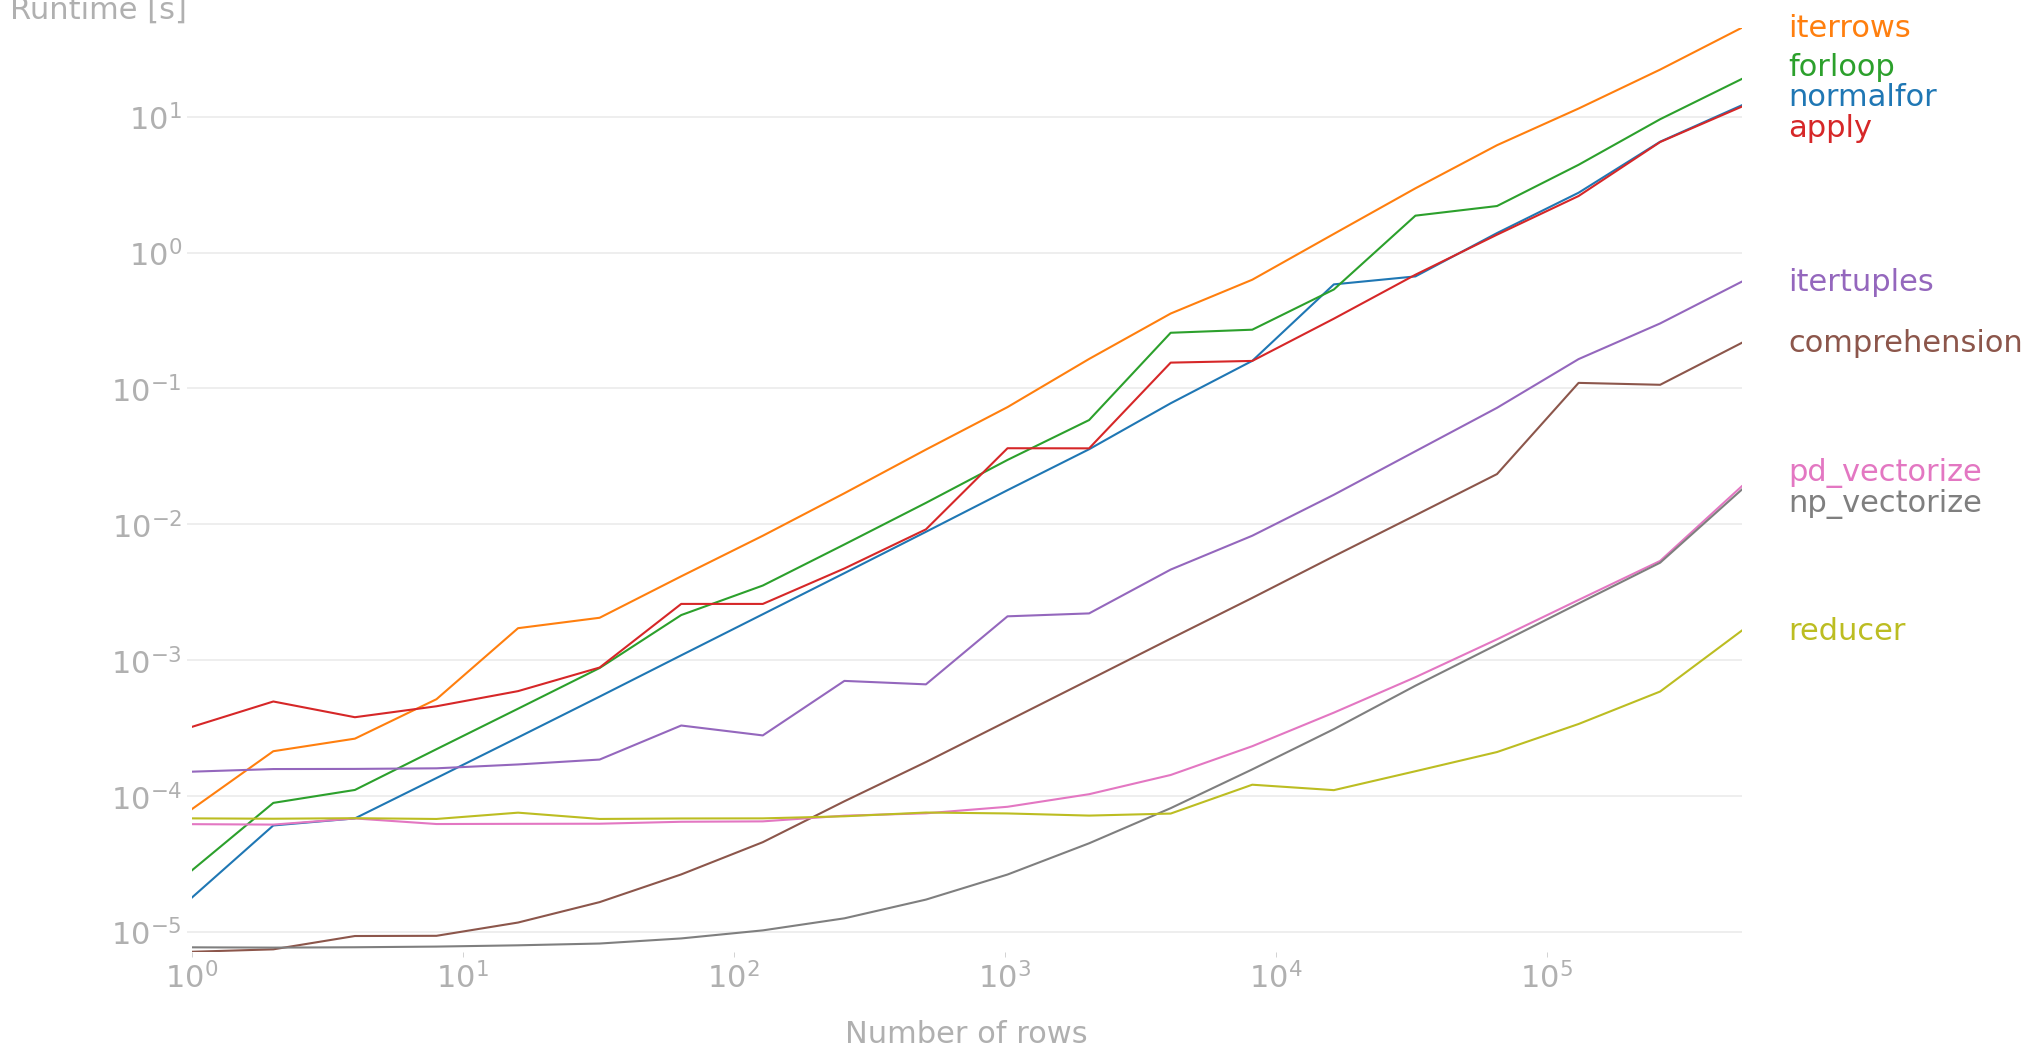

In [ ]:
!pip install -q perfplot

import perfplot
import matplotlib.pyplot as plt
from functools import reduce
plt.rcParams.update({'font.size': 22})

# Techniques
def normalfor(df):
    total=[]
    for i in range(df.shape[0]):
        total.append(df['col1'][i] + df['col2'][i])
    return total
def forloop(df):
    total = []
    for index in range(len(df)):
        total.append(df['col1'].iloc[index]
                   + df['col2'].iloc[index])
    return total

def itertuples(df):
    total = []
    for row in df.itertuples():
        total.append(row[1] + row[2])
    return total

def iterrows(df):
    total = []
    for index, row in df.iterrows():
        total.append(row['col1']
                   + row['col2'])
    return total

def apply(df):
    return df.apply(lambda row: row['col1']
                              + row['col2'], axis=1).to_list()

def comprehension(df):
    return [src + dst for src, dst in zip(df['col1'], df['col2'])]

def pd_vectorize(df):
    return (df['col1'] + df['col2']).to_list()

def np_vectorize(df):
    return (df['col1'].to_numpy() + df['col2'].to_numpy()).tolist()


def reducer(df):
    return reduce(lambda a, b: a+b, [df.col1,df.col2])

# Perfplot
functions = [normalfor,iterrows, forloop, apply, itertuples,
             comprehension, pd_vectorize, np_vectorize, reducer]
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})

out = perfplot.bench(
      setup=lambda n: pd.concat([df]*n, ignore_index=True),
      kernels=functions,
      labels=[str(f.__name__) for f in functions],
      n_range=[2**n for n in range(20)],
      xlabel='Number of rows',
)

plt.figure(figsize=(20,12))
out.show()